In [1]:
%jsroot off

In [2]:
#include<TFile.h>
#include<TH1.h>
#include<TMath.h>
#include<TLine.h>
#include<TPoint.h>
#include<iostream>
#include<string>
#include<stdio.h>

In [3]:
TFile *f=new TFile("//Analysis/Output_HZZAnalysis/data.root");
//TFile *f = new TFile("//Analysis/Output_HZZAnalysis/ggH125_ZZ4lep.root"); // Prueba MC gg->H125->ZZ->4lep.
mass_four_lep->Print(); // Test de lectura de datos

TH1.Print Name  = mass_four_lep, Entries= 321, Total sum= 31


In [4]:
// gROOT->SetStyle("ATLAS"); // Establecer estilo.
//gStyle->SetOptStat(1122101);
//gStyle->SetOptStat(1001110);
gStyle->SetOptStat(0);
//gStyle->SetOptStat("nemrou"); // Dibujar estadisticas de grafico.
//gStyle->SetOptFit(1112);
gStyle->SetOptFit(1100);

In [5]:
TCanvas *c1 = new TCanvas("c1","c1",10,10,900,600);
c1->SetGrid();

In [6]:
TH1F *m_four_lep = (TH1F*)f->Get("mass_four_lep");
m_four_lep->ClearUnderflowAndOverflow();
/*Double_t factor = 1.;
m_four_lep->Scale(factor/m_four_lep->Integral());*/
//m_four_lep->Draw();
m_four_lep->Draw("E1"); // E1: Para representar los puntos con barras de error.

In [7]:
Int_t fit = 0; // Opciones 0, 1, 2, 3, 4, 5, 6 = Distribuciones

In [8]:
Double_t myBW(Double_t* x, Double_t* par) // Distribución de Breit-Wigner relativista
{
    Double_t arg1 = sqrt(pow(par[2],2)*(pow(par[2],2)+pow(par[1],2))); // Gamma=par[1] M=par[2]
    Double_t arg2 = 2*sqrt(2)*par[2]*par[1]*arg1/(TMath::Pi()*sqrt(pow(par[2],2)+arg1));
    Double_t arg3 = pow((pow(x[0],2)-pow(par[2],2)),2);
    Double_t arg4 = pow(par[2],2)*pow(par[1],2);
    return par[0]*arg2/(arg3+arg4);
}

In [9]:
Double_t myBWDist(Double_t* x, Double_t* par)
{   // Double_t x, Double_t mean, Double_t gamma
    return par[0]*TMath::BreitWigner(x[0], par[1], par[2]);
}

In [10]:
Double_t myCauchyDist(Double_t* x, Double_t* par)
{   // Double_t x, Double_t t, Double_t s
    // t is the location parameter
    // s is the scale parameter
    return par[0]*TMath::CauchyDist(x[0],par[1],par[2]);
}

In [11]:
Double_t myGammaDist(Double_t* x, Double_t* par) {
    if ((x[0]-par[2]) < 0) {
        return 0.0;
    } else if ((x[0]-par[2]) == 0) {
        if (par[0] == 1) {
            return par[3]*(1.0/par[1]);
        } else {
            return 0.0;
        }
    } else if (par[0] == 1) {
        return  par[3]*(std::exp(-(x[0]-par[2])/par[1])/par[1]);
    } else {
        return par[3]*(std::exp((par[0] - 1) * std::log((x[0]-par[2])/par[1]) - (x[0]-par[2])/par[1] - ROOT::Math::lgamma(par[0]))/par[1]);
    }
}

In [12]:
Double_t myChisquareDist(Double_t* x, Double_t* par) {
       if ((x[0]-par[2]) <  0) {
          return 0.0;
       }
       Double_t a = par[1]/2 -1.;
       // let return inf for case x  = x0 and treat special case of r = 2 otherwise will return nan
       if (x[0] == par[2] && a == 0) return 0.5;
 
       return par[0]*(std::exp ((par[1]/2 - 1) * std::log((x[0]-par[2])/2) - (x[0]-par[2])/2 - ROOT::Math::lgamma(par[1]/2))/2);
}

In [13]:
if (fit == 0) {
    TF1 *f1 = new TF1("f1","myBW",110,140,3);
    f1->SetParameters(1,m_four_lep->GetStdDev(),m_four_lep->GetMean());
    f1->SetParNames ("Constant","Standard deviation","Mean"); // OJO con el tipo de parámetro.
}
if (fit == 1) {TF1 *f1 = new TF1("f1","gaus",110,140);}
if (fit == 2) {TF1 *f1 = new TF1("f1","landau",110,140);}
if (fit == 3) {
    TF1 *f1 = new TF1("f1","myCauchyDist",110,140,3);
    f1->SetParameters(1,m_four_lep->GetMean(),m_four_lep->GetStdDev());
    f1->SetParNames ("Constant","Mean","Standard deviation"); // OJO con el tipo de parámetro.
}
if (fit == 4) {
    TF1 *f1 = new TF1("f1","myBWDist",110,140,3);
    f1->SetParameters(1,m_four_lep->GetMean(),m_four_lep->GetStdDev());
    f1->SetParNames ("Constant","Mean","Standard deviation"); // OJO con el tipo de parámetro.
}
if (fit == 5) {
    TF1 *f1 = new TF1("f1","myChisquareDist",110,140,3);
    f1->SetParameters(1,m_four_lep->GetMean(),m_four_lep->GetStdDev());
    f1->SetParNames ("Constant","Mean","Standard deviation"); // OJO con el tipo de parámetro.
}
if (fit == 6) {
    TF1 *f1= new TF1("f1","myGammaDist",110,140,4);
    f1->SetParameters(1,m_four_lep->GetMean(),m_four_lep->GetStdDev(),1);
    f1->SetParNames("Constant","Mean","Standard deviation","Constant");       
}

In [14]:
m_four_lep->Fit("f1","R"); // Puede usarse V para agregar más detalles estadísticos.
f1->SetLineColor(kRed);

 FCN=3.28022 FROM MIGRAD    STATUS=CONVERGED     481 CALLS         482 TOTAL
                     EDM=3.83274e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   3.1 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.17222e+02   2.30664e+01   6.95216e-02   1.41432e-06
   2  Standard deviation   6.21817e+00   2.03596e+00   4.85480e-04  -9.48917e-06
   3  Mean         1.23553e+02   7.34337e-01  -4.08006e-03   1.88075e-05


In [15]:
TMath::Prob(f1->GetChisquare(),7-3)

(double) 0.51207289


In [16]:
// Print the full information of the fit including covariance matrix.
// f1->Print("V"); 

// Store the result in a ROOT file.
//f1->Write(); 

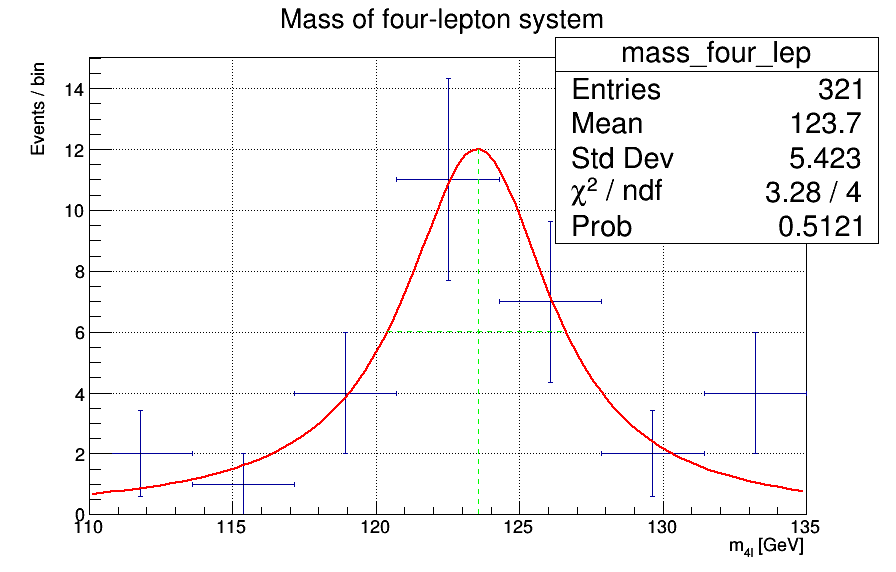

Coordenada del punto máximo en el ajuste: (123.553,12.0127).
Intersecciones en m4l a média altura: 120.404 GeV y 126.624 GeV.
Ancho de decaimiento, Γ = 6.22014 GeV.
Tiempo de vida media, τ = 1.60768e-10 s.


In [17]:
minx = f1->GetXmin(); // Mínimo en x del ajuste.
maxx = f1->GetXmax(); // Máximo en x del ajuste.

mode_x = f1->GetMaximumX(minx,maxx); // Coordenada x del máximo en el ajuste dentro del intervalo [minx,maxx].
mode_y = f1->Eval(mode_x); // Coordenada y del máximo.

upper_halfwidth = f1->GetX(mode_y/2.0,mode_x,maxx);
lower_halfwidth = f1->GetX(mode_y/2.0,minx,mode_x);

width = upper_halfwidth-lower_halfwidth;

cout    << "Coordenada del punto máximo en el ajuste: (" << mode_x << "," << mode_y << ")." << endl
        << "Intersecciones en m4l a média altura: " << lower_halfwidth << " GeV" << " y " << upper_halfwidth << " GeV." << endl
        << "Ancho de decaimiento, \u0393 = " << width << " GeV." << endl
        << "Tiempo de vida media, \u03C4 = " << 1/(width*1E9) << " s." << endl;
        //<< "Tiempo de vida media, \u03C4 = " << 4.135667696E-15/(2*TMath::Pi()*width*1E9) << " s." << endl; // Consultar.


TLine *l1 = new TLine(lower_halfwidth,mode_y/2.0,upper_halfwidth,mode_y/2.0);
l1->SetLineColor(kGreen);
l1->SetLineStyle(7);
l1->Draw("same");

TLine *l2 = new TLine(mode_x,mode_y,mode_x,0);
l2->SetLineColor(kGreen);
l2->SetLineStyle(7);
l2->Draw("same");

c1->Draw();

#### OJO Revisar los orden de magnitud y unidades.

mpv is a location parameter and correspond approximatly to the most probable value.